In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
from matplotlib import cm
from scipy.interpolate import interpn
from scipy import stats
import seaborn as sns
import warnings

%matplotlib inline

plt.rcParams["font.family"] = "Arial"

# ignore warning
warnings.filterwarnings('ignore')

## scatter plot

0.9598787287342162


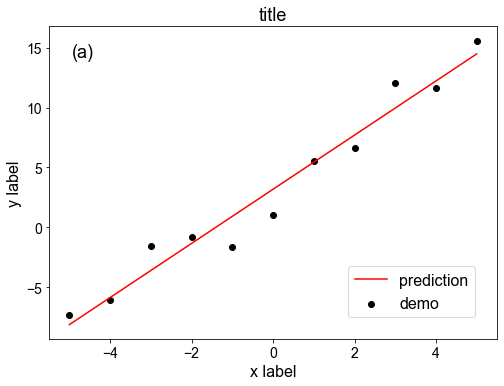

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), sharex=False)
fig.tight_layout(pad=5.0)
light_jet = cm.jet#cmap_map(lambda x: x/3 + 0.66, cm.jet)


title_size = 18
label_size = 16
legend_size = 16
tick_size = 14


x = np.arange(-5, 6)
y = x*2+np.random.random(size=len(x))*10

ax.scatter(x, y, color='k', label='demo')
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(r_value**2)
ax.plot(x, x*slope+intercept, 'r', label='prediction')


#ax.set_xticks(range(0, 160, 20))
ax.tick_params(axis='both', labelsize=tick_size)

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
#ymin, ymax = -1., 1.
#xmin, xmax = 0., 10.
#ax.set_ylim(ymin, ymax)
#ax.set_xlim(xmin, xmax)
ax.text((xmin+(xmax-xmin)*0.05), (ymin+(ymax-ymin)*0.9), '(a)', fontsize=18)

ax.legend(loc='center left', bbox_to_anchor=(0.65, 0.15), fontsize=legend_size)
ax.set_xlabel('x label', fontsize=label_size)
ax.set_ylabel('y label', fontsize=label_size)
ax.set_title('title', fontsize=title_size)
plt.show()

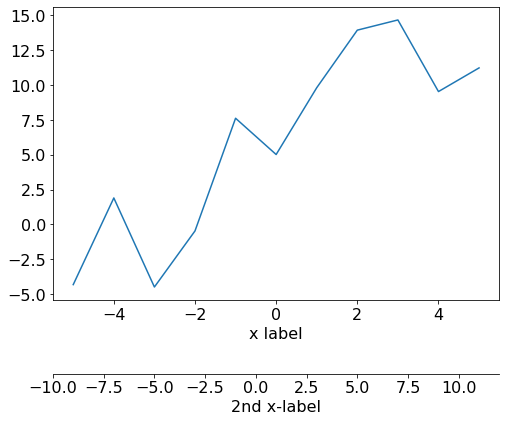

In [6]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

label_size = 16

# Add some extra space for the second axis at the bottom
fig.subplots_adjust(bottom=0.2)

x = np.arange(-5, 6)
x2 = x*2+1
y = x*2+np.random.random(size=len(x))*10

ax1.plot(x, y)
ax2.plot(x2, y, color='None')

ax1.set_xlabel('x label', fontsize=label_size)
ax2.set_ylabel('y label', fontsize=label_size)
new_tick_locations = np.arange(0, 7, 1)

def tick_function(X, X_all):
    V = diam[np.where(X_all==X)]
    return ["%.3f" % z for z in V]

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.25))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

for sp in ax2.spines.values():
    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)

#ax2.set_xticks(np.arange(0.0, 1.01, 0.2))
#ax2.set_xticklabels(tick_function(new_tick_locations, xa))
ax2.set_xlabel(r"2nd x-label", fontsize=label_size)
ax1.tick_params(axis='both', labelsize=16)
ax2.tick_params(axis='both', labelsize=16)
#fig.savefig('fig_name.png', dpi=150, bbox_inches='tight')
plt.show()

## map

In [15]:
import cartopy.crs as ccrs
import cartopy.feature as cf  
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.img_tiles as cimgt
from urllib.request import urlopen, Request
import io
from PIL import Image

def new_get_image(self, tile):
    url = self._image_url(tile) 
    req = Request(url)
    req.add_header('User-agent', 'your bot 0.1')
    fh = urlopen(req)
    im_data = io.BytesIO(fh.read())
    fh.close()
    img = Image.open(im_data)
    img = img.convert(self.desired_tile_form)
    return img, self.tileextent(tile), 'lower'

cimgt.GoogleWTS.get_image = new_get_image
osm_img = cimgt.GoogleTiles(style='satellite')

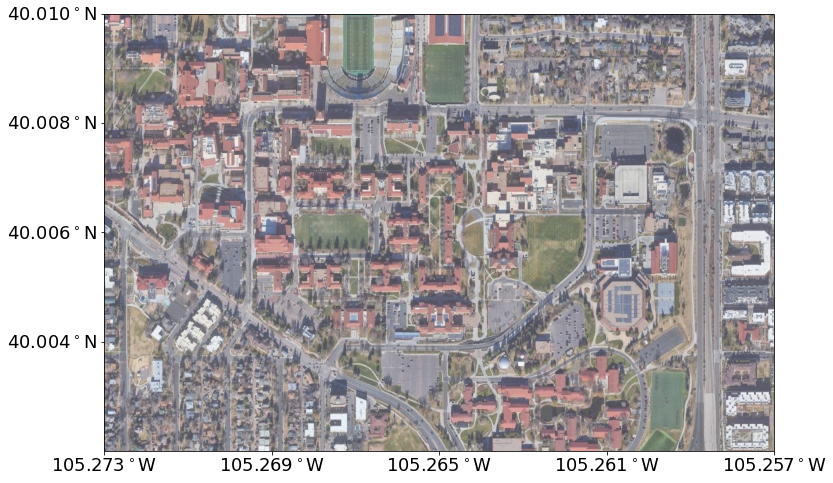

In [16]:
fig = plt.figure(figsize=(12,9)) # open matplotlib figure
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
center_pt = [np.mean([40.002, 40.01]), 
             np.mean([-105.273, -105.257])] # lat/lon of One World Trade Center in NYC
zoom = 0.00425 # for zooming out of center point
extent = [center_pt[1]-(zoom*2.0),center_pt[1]+(zoom*2.0),center_pt[0]-zoom,center_pt[0]+zoom] # adjust to zoom
extent = [-105.273, -105.257, 40.002, 40.01]
ax1.set_extent(extent) # set extents
ax1.set_xticks(np.linspace(extent[0],extent[1],5),crs=ccrs.PlateCarree()) # set longitude indicators
ax1.set_yticks(np.linspace(extent[2],extent[3],5)[1:],crs=ccrs.PlateCarree()) # set latitude indicatorslon_formatter = LongitudeFormatter(number_format='0.3f',degree_symbol='',dateline_direction_label=True) # format lons
lon_formatter = LongitudeFormatter(number_format='0.3f',degree_symbol='$^\circ$',dateline_direction_label=True) # format lons
lat_formatter = LatitudeFormatter(number_format='0.3f',degree_symbol='$^\circ$') # format lats
ax1.xaxis.set_major_formatter(lon_formatter) # set lons
ax1.yaxis.set_major_formatter(lat_formatter) # set lats
ax1.tick_params(axis='both', labelsize=18)
scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale), alpha=0.75) # add OSM with zoom specification
# NOTE: zoom specifications should be selected based on extent:
# -- 2     = coarse image, select for worldwide or continental scales
# -- 4-6   = medium coarseness, select for countries and larger states
# -- 6-10  = medium fineness, select for smaller states, regions, and cities
# -- 10-12 = fine image, select for city boundaries and zip codes
# -- 14+   = extremely fine image, select for roads, blocks, buildings

#val = ax1.scatter(data.lon, data.lat, c=data.NO2_dSCD, cmap='rainbow', 
#                  s=75, 
#                  edgecolor='k',
#                  transform=ccrs.PlateCarree())

# Create new axes according to image position
#cax = fig.add_axes([ax1.get_position().x1+0.05,
#                    ax1.get_position().y0,
#                    0.02,
#                    ax1.get_position().height,])
#cbar = fig.colorbar(val, cax=cax)
#cax.tick_params(labelsize=18)
#cbar.set_label('RMS-filtered $\mathrm{NO_2}$ dSCD (molec. $\mathrm{cm^{-2}}$)', fontsize=20)
# set title
#ax1.set_title(title, fontsize=22)

# save figure
#fig.savefig('fig_name.png', dpi=150, bbox_inches='tight')

plt.show() # show the plot

## histogram with pdf curve

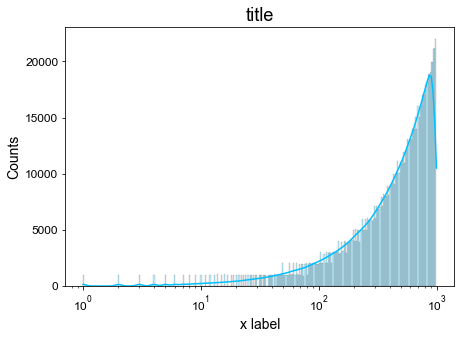

In [29]:
fig = plt.figure(figsize=(6, 4))

ax1 = fig.add_axes([0.05, 0.05, 0.9, 0.9])
label_size = 14
title_size = 18

array = np.random.randint(low=1, high=1000, size=1000000)

sns.histplot(array, kde=True, log_scale=True, fill=True, ax=ax1, alpha=0.25, color='deepskyblue', label='1000 mb')

#ax1.set_xscale('log')
ax1.tick_params(axis='both', labelsize=label_size-2)
#ax1.tick_params(axis='y', labelsize=13)
ax1.set_xlabel('x label', fontsize=label_size)
ax1.set_ylabel('Counts', fontsize=label_size)

ax1.set_title('title', fontsize=title_size)
plt.show()

In [ ]:
tick_size = 14
label_size=16
textsize=16


label_CO = '$\mathregular{k_{CO}}$[$\mathregular{CO}$]'
label_NO = '$\mathregular{k_{NO}}$[$\mathregular{NO}$]'
label_NO2 = '$\mathregular{k_{NO_2}}$[$\mathregular{NO_2}$]'
label_SO2 = '$\mathregular{k_{SO_2}}$[$\mathregular{SO_2}$]'
label_CH4 = '$\mathregular{k_{CH_4}}$[$\mathregular{CH_4}$]'
label_VOCs = '$\mathregular{k_{VOCs}}$[$\mathregular{VOCs}$]'


x_label = 'x label'
y_label = 'y label'

x_input = np.arange(10)
y_input = np.cos(x_input)+np.random

fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for region_name in ['region_a', 'region_b', 'region_c', 'region_d', 'region_e']:
    temp_aircraft = aircraft_data[sub_region_test(aircraft_data.lat, aircraft_data.lon, region=region_name)]

    x_list = temp_aircraft['CH4']*k_list['CH4'] +\
             temp_aircraft['CO']*k_list['CO'] +\
             temp_aircraft['NO']*k_list['NO'] + \
             temp_aircraft['NO2']*k_list['NO2'] +\
             temp_aircraft['SO2']*k_list['SO2']
    y_list = temp_aircraft['SO2']*k_list['SO2']
    VOC_list = ['FOR', 'MET', 'ACN', 'ACA', 'ACE', 'ISO', 'BEN', 'TOL', 'XYL']
    for i in range(len(VOC_list)):
        x_list += temp_aircraft[VOC_list[i]]/1000*k_list[VOC_list[i]]
    x_input = temp_aircraft['SO2']*k_list['SO2']/x_list
    y_input = temp_aircraft['SO4']
    x_input_all = np.append(x_input_all, x_input)
    y_input_all = np.append(y_input_all, y_input)
    ax.scatter(x_input, y_input, label=f'Region {region_name[-1]}')


mask = ~np.isnan(x_input_all) & ~np.isnan(y_input_all)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_input_all[mask], y_input_all[mask])
xmin, xmax = x_input_all[mask].min()/1.2, x_input_all[mask].max()*1.2
ymin, ymax = y_input_all[mask].min()/1.2, y_input_all[mask].max()*1.2
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=14)
# plot regression line
ax.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], 'r')
# label and text setting
ax.set_xlabel(x_label, color='k', fontsize=label_fontsize-3, labelpad=10)
ax.set_ylabel('Sulfate ($\mathregular{{\mu}g}$/$\mathregular{m^3}$)', color='k', fontsize=label_fontsize, labelpad=10)
ax.xaxis.set_tick_params(labelsize=ytick_size)
ax.yaxis.set_tick_params(labelsize=ytick_size)
ax.text((xmax-xmin)*0.65+xmin, (ymax-ymin)*0.22+ymin, 'y = %.3fx + %.3f' %(slope, intercept), fontsize=18)
ax.text((xmax-xmin)*0.65+xmin, (ymax-ymin)*0.14+ymin, '$\mathregular{R^2}$ = %.3f' %(r_value**2), fontsize=18)
p_value_print = 'p value = $\mathregular{%.3f}$' %(p_value) if p_value > 0.001 else 'p value = $\mathregular{%.1e}$' %(p_value)
ax.text((xmax-xmin)*0.65+xmin, (ymax-ymin)*0.07+ymin, p_value_print, fontsize=textsize)
ax.set_title('All regions', fontsize=label_fontsize+2)
# save figure
#fig.savefig('figures/Fig.S4-PAN-NOy.jpg', dpi=300, bbox_inches='tight')
plt.show()

## inside figure

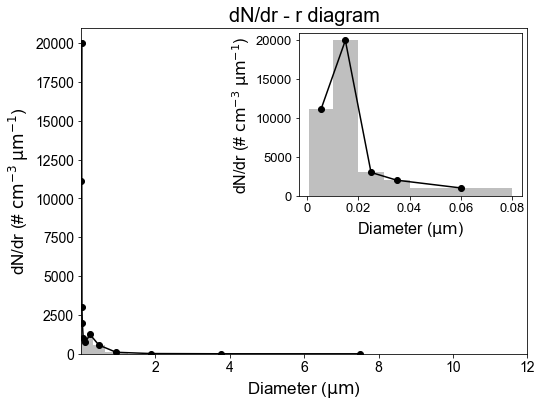

In [34]:
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid.inset_locator import inset_axes

dN = np.array([100, 200, 30, 20, 40, 60, 200, 180, 60, 20, 5, 1], dtype=np.float32)    # in cm-3
size_low = np.array([0.001, 0.01, 0.02, 0.03, 0.04, 0.08, 0.16, 0.32, 0.64, 1.25, 2.5, 5], dtype=np.float32)
size_high = np.array([0.01, 0.02, 0.03, 0.04, 0.08, 0.16, 0.32, 0.64, 1.25, 2.5, 5, 10], dtype=np.float32)
dr = np.array([0.009, 0.01, 0.01, 0.01, 0.04, 0.08, 0.16, 0.32, 0.61, 1.25, 2.5, 5], dtype=np.float32)
r = np.array([0.0055, 0.015, 0.025, 0.035, 0.06, 0.12, 0.24, 0.48, 0.945, 1.875, 3.75, 7.5], dtype=np.float32)

f, ax=plt.subplots(figsize=(8, 6))
ax2 = inset_axes(ax, 
                    width="50%", # width = 30% of parent_bbox
                    height="50%", # height : 1 inch
                    loc=1)
ax.bar(r, dN/dr, width=dr, color='grey', alpha=0.5)
ax.plot(r, dN/dr, '-o', color='k')
#ax.set_xscale('log')
ax.set_xlim(1e-3, 1.2e1)


ax.tick_params(axis='both', labelsize=14)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:g}'.format(x)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
ax.set_ylabel('dN/dr (# $\mathrm{cm^{-3}\;\mu m^{-1}}$)', fontsize=17)
ax.set_xlabel('Diameter ($\mathrm{\mu m}$)', fontsize=17)
ax.set_title('dN/dr - r diagram', fontsize=20)

end = 5
ax2.bar(r[:end], (dN/dr)[:end], width=dr[:end], color='grey', alpha=0.5)
ax2.plot(r[:end], (dN/dr)[:end], '-o', color='k')
ax2.tick_params(axis='both', labelsize=14-1)
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:g}'.format(x)))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
ax2.set_ylabel('dN/dr (# $\mathrm{cm^{-3}\;\mu m^{-1}}$)', fontsize=17-1)
ax2.set_xlabel('Diameter ($\mathrm{\mu m}$)', fontsize=17-1)

plt.show()

## month tick

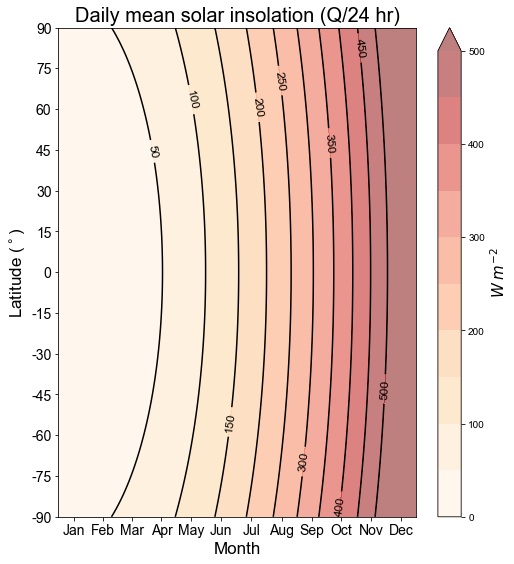

In [45]:
# xticks
mon_len = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
mon_mid = np.cumsum(mon_len)-mon_len/2
mon_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


# annual day
t = 2*np.pi*np.arange(365)/365
# latitude array
lat = np.linspace(-90, 90, 361)
# convert latitude to phi 
phi = lat/180*np.pi
# make 2-d array of phi and time
t_v, phi_v = np.meshgrid(t, phi, indexing='ij')   

data = (t_v**2+phi_v**2)*15


fig, ax = plt.subplots(figsize=(8, 9))
conf = ax.contourf(t_v, phi_v, data, np.arange(0, 550, 50), cmap='OrRd',
            vmax=500, alpha=0.5, extend='max', linestyles=None)
contours = ax.contour(t_v, phi_v, data, np.arange(0, 550, 50),
                      colors='black', vmax=500)
ax.clabel(contours, inline=True, fontsize=12)
ax.set_ylim(phi[0], phi[-1])
ax.set_xticks(mon_mid*2*np.pi/365)
ax.set_xticklabels(mon_name, fontsize=14)
ax.set_yticks(phi[::30])
ax.set_yticklabels([f'{i:.0f}' for i in lat[::30]], fontsize=14)
#ax.plot(t, delta, '--', color='k')
ax.set_xlabel('Month', fontsize=17)
ax.set_ylabel('Latitude ($^\circ$)', fontsize=17)
ax.set_title('Daily mean solar insolation (Q/24 hr)', fontsize=20)
cbar = fig.colorbar(conf)
cbar.set_label('$W\;m^{-2}$', fontsize=15)
plt.show()

In [ ]:
fig, ((ax00, ax01, ax02, ax03, ax04), 
      (ax10, ax11, ax12, ax13, ax14), 
      (ax20, ax21, ax22, ax23, ax24),
      (ax30, ax31, ax32, ax33, ax34),
      (ax40, ax41, ax42, ax43, ax44)) = \
        plt.subplots(5, 5, sharex=False, sharey=False, figsize=(30, 25))
fig.tight_layout(pad=6.0)

mark_size = 12
xytick_size = 16
label_size = 22
scatter_arg = dict(s=25, c='tab:blue', alpha=0.5, marker='o')


index = 0
ax_list = [(ax00, ax01, ax02, ax03, ax04), 
           (ax10, ax11, ax12, ax13, ax14), 
           (ax20, ax21, ax22, ax23, ax24),
           (ax30, ax31, ax32, ax33, ax34),
           (ax40, ax41, ax42, ax43, ax44)]
plot_vars = [('SO2', 'CH4'),
             ('SO2', 'CO'),
             ('SO2', 'NO'),
             ('SO2', 'NO2'),
             ('SO2', 'ISO')]
#x_max = [0.65]*6
y_max = [1000, 40, 15, 0.8, 35, 1.5]
y_label_list = ['$\mathregular{CH_4}$ (ppb)',
                'CO (ppb)',
                'NO (ppb)',
                '$\mathregular{NO_2}$ (ppb)',
                'isoprene (ppb)']
label_text = ['a', 'b', 'c', 'd', 'e', 'f']
for region in range(5):
    for index in range(5):
        region_name = ['region_a', 'region_b', 'region_c', 'region_d', 'region_e'][region]
        temp_aircraft = aircraft_data[sub_region_test(aircraft_data.lat, aircraft_data.lon, region=region_name)]
        (x_col, y_col) = plot_vars[index]
        #print(index, region, y_col)
        ax = ax_list[index][region]
        #ax.set_ylim(0, y_max[index])
        #ax.set_xlim(0, x_max[index])
        
        if x_col == 'SO2':
            ax.set_xlabel('$\mathregular{SO_2}$ (ppb)', color='k', fontsize=label_size, labelpad=10)
        else:
            ax.set_xlabel('$\mathregular{SO_2}$/$\mathregular{O_3}$ ratio (ppb/ppb)', color='k', fontsize=label_size, labelpad=10)
        ax.set_ylabel(y_label_list[index], color='k', fontsize=label_size, labelpad=10)
        ax.scatter(temp_aircraft[x_col], temp_aircraft[y_col], **scatter_arg)
        mask = ~np.isnan((temp_aircraft[x_col])) & ~np.isnan((temp_aircraft[y_col]))
        slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = stats.linregress(temp_aircraft[x_col][mask],
                                                                                 temp_aircraft[y_col][mask])
        (xmin, xmax), (ymin, ymax) = ax.get_xlim(), ax.get_ylim()
        y_low, y_high = xmin*slope_2+intercept_2, xmax*slope_2+intercept_2
        ax.plot([xmin, xmax], [y_low, y_high], c='r', linewidth=2, zorder=1)           
        (xmin, xmax), (ymin, ymax) = ax.get_xlim(), ax.get_ylim()
        #ax.text((xmax-xmin)*0.03+xmin, (ymax-ymin)*0.9+ymin, f'({label_text[index]})', fontsize=label_size, weight='bold')
        ax.text((xmax-xmin)*0.5+xmin, (ymax-ymin)*0.13+ymin, '$\mathregular{R^2}$: %.3f' %r_value_2**2, fontsize=label_size-3)
        if p_value_2 > 0.001:
            ax.text((xmax-xmin)*0.5+xmin, (ymax-ymin)*0.03+ymin, r'p value: $\mathregular{%.3f}$' %(p_value_2), fontsize=label_size-3)
        else:
            ax.text((xmax-xmin)*0.5+xmin, (ymax-ymin)*0.03+ymin, r'p value: $\mathregular{%.1e}$' %(p_value_2), fontsize=label_size-3)


        ax.xaxis.set_tick_params(labelsize=xytick_size)
        ax.yaxis.set_tick_params(labelsize=xytick_size) 
        if index==0:
            ax.set_title(region_name, fontsize=label_size+2)
        index += 1
#fig.savefig('figures/Fig.2-before_after_division_O3.jpg', dpi=300, bbox_inches='tight')
#plt.show()

In [ ]:
# regression line
def plot_O3(aircraft_data):
    """
    Plot Figure S4: The relationship between PAN and NOy at an altitude of 600 m over Western Taiwan. 
    The slope of the regression line is utilized to estimate the proportion of PAN in NOy.
    """
    # plot setting parameters
    label_fontsize = 22
    legend_dict = dict(ncol=2, bbox_to_anchor=(0.5, -0.22), loc='center', borderaxespad=0, labelspacing=0.5, frameon=True, fontsize=28)
    epa_scatter_s = 100
    epa_scatter_alpha = 0.5
    ytick_size=18
    textsize = 18
    
    #'O3_AMTEX', 'O3_FAIROCI'
    x_label = '$\mathregular{O_3}$ (AMTEX)'
    y_label = '$\mathregular{O_3}$ (FAIROCI)'
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    
    x_input = aircraft_data['O3_AMTEX']
    y_input = aircraft_data['O3_FAIROCI']
    avg = aircraft_data['O3']
    
    ax.scatter(x_input, y_input, color='k')
    #ax.scatter(x_input, avg, color='b')

    mask = ~np.isnan(x_input) & ~np.isnan(y_input)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_input[mask], y_input[mask])       

    xmin, xmax = x_input[mask].min()/1.2, x_input[mask].max()*1.2
    ymin, ymax = y_input[mask].min()/1.2, y_input[mask].max()*1.2
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    # plot regression line
    ax.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], 'r')
    # label and text setting
    ax.set_xlabel('%s (ppb)'%(x_label), color='k', fontsize = label_fontsize, labelpad=10)
    ax.set_ylabel('%s (ppb)'%(y_label), color='k', fontsize = label_fontsize, labelpad=10)
    ax.xaxis.set_tick_params(labelsize=ytick_size)
    ax.yaxis.set_tick_params(labelsize=ytick_size)
    ax.text((xmax-xmin)*0.65+xmin, (ymax-ymin)*0.22+ymin, 'y = %.3fx + %.3f' %(slope, intercept), fontsize=18)
    ax.text((xmax-xmin)*0.65+xmin, (ymax-ymin)*0.14+ymin, '$\mathregular{R^2}$ = %.3f' %(r_value**2), fontsize=18)
    p_value_print = 'p value = $\mathregular{%.3f}$' %(p_value) if p_value > 0.001 else 'p value = $\mathregular{%.1e}$' %(p_value)
    ax.text((xmax-xmin)*0.65+xmin, (ymax-ymin)*0.07+ymin, p_value_print, fontsize=textsize)
    # save figure
    #fig.savefig('figures/Fig.S4-PAN-NOy.jpg', dpi=300, bbox_inches='tight')
    plt.show()

plot_O3(aircraft_data)

In [ ]:
def plot_airborne_avg_sulfate_to_so2_oxi_rate_frac(ax, label_text, aircraft_data, detail=False):
    label_fontsize = 26
    slope_CO_list, slope_CO_err_list, \
    slope_NO_list, slope_NO_err_list, \
    slope_NO2_list, slope_NO2_err_list = ([] for _ in range(6))
    slope_CH4_list, slope_CH4_err_list, \
    slope_VOC_list, slope_VOC_err_list = ([] for _ in range(4))
    so4, so4_err, SO2_list, RH_list, O3_list, T_list, NO_list, NOy_list = ([] for _ in range(8))
    pm_all, SO4_all = [], []
    
    for region_name in ['region_a', 'region_b', 'region_c', 'region_d', 'region_e']:
        temp_aircraft = aircraft_data[sub_region_test(aircraft_data.lat, aircraft_data.lon, region=region_name)]
        so4.append(temp_aircraft['SO4'].mean())
        so4_err.append(temp_aircraft['SO4'].std()/np.sqrt(temp_aircraft['SO4'].count()))
        pm_all.extend(temp_aircraft['SO4']+temp_aircraft['NO3']+temp_aircraft['NH4']+temp_aircraft['CHL']+temp_aircraft['ORG'])
        SO4_all.extend(temp_aircraft['SO4'])
        SO2_list.extend(temp_aircraft['SO2'])
        RH_list.extend(temp_aircraft['RELHUM'])
        O3_list.extend(temp_aircraft['O3'])
        T_list.extend(temp_aircraft['Total_Air_Temp'])
        NO_list.extend(temp_aircraft['NO'])
        NOy_list.extend(temp_aircraft['NOy'])
        count_CO = air_col_to_SO2O3_slope_cal(temp_aircraft, 'CO_over_O3', slope_CO_list, slope_CO_err_list)
        count_NO = air_col_to_SO2O3_slope_cal(temp_aircraft, 'NO_over_O3', slope_NO_list, slope_NO_err_list)
        count_NO2 = air_col_to_SO2O3_slope_cal(temp_aircraft, 'NO2_over_O3', slope_NO2_list, slope_NO2_err_list)    
        count_CH4 = air_col_to_SO2O3_slope_cal(temp_aircraft, 'CH4_over_O3', slope_CH4_list, slope_CH4_err_list)    
    slope_x = 1/(np.array(slope_CH4_list)*0.0037+np.array(slope_CO_list)*0.141+np.array(slope_NO_list)*21.2+np.array(slope_NO2_list)*16.5+1)  
    #slope_x = 1/(np.array(slope_CO_list)*0.141+np.array(slope_NO_list)*21.2+np.array(slope_NO2_list)*16.5+1)  
    slope_x_err = slope_x*np.sqrt(#(0.0037*np.array(slope_CH4_err_list)/np.sqrt(count_CH4))**2+\
                                  (0.141*np.array(slope_CO_err_list)/np.sqrt(count_CO))**2+\
                                  (21.2*np.array(slope_NO_err_list)/np.sqrt(count_NO))**2+\
                                  (16.5*np.array(slope_NO2_err_list)/np.sqrt(count_NO2))**2)

    print(slope_x)
    # -------------- Start Plotting --------------------
    ax.errorbar(slope_x, so4, yerr=so4_err, linestyle="None", fmt='-o', ecolor='darkgrey', c='k', markersize=8, capsize=5, zorder=3)
    c_l = [plt.cm.rainbow(i/4) for i in range(5)]
    region_list = ['region_a', 'region_b', 'region_c', 'region_d', 'region_e']
    for i in range(5):
        ax.scatter(slope_x[i], so4[i], s=50, color=c_l[i], alpha=1, marker='o', 
                   label=' '.join(['Region', region_list[i][-1].capitalize()]), zorder=5)
    ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=16)
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=18)
    ax.set_xlabel('$\mathregular{SO_2}$ oxidation rate fraction', color='k', fontsize=22, labelpad=10)
    ax.set_ylabel('Sulfate ($\mathregular{{\mu}g}$/$\mathregular{m^3}$)', color='k', fontsize=22, labelpad=10)
    
    slope_final, intercept_final, r_value_final, p_value_final, std_err_final = stats.linregress(slope_x, so4)
    x = np.linspace(slope_x.min(), slope_x.max(), num=50, endpoint=True)
    n = len(so4)
    popt, pcov = curve_fit(func, slope_x, so4)

    # retrieve parameter values to compute R2
    a, b = popt[0], popt[1]
    r2 = 1.0-(sum((so4-func(slope_x,a,b))**2)/((n-1.0)*np.var(so4, ddof=1)))
    
    # calculate parameter confidence interval
    a, b = unc.correlated_values(popt, pcov)

    # calculate explicable SO4 percentage
    SO4_max = np.array(so4).max()
    SO4_max_err = np.array(so4).std()
    explicable_SO4_percentage = (SO4_max-intercept_final)/SO4_max*100
    rxn_time = (SO4_max-intercept_final)/(1.7e-12*8.3e6*2.46e10*3600/6.02e23*1e6*96*1e6)/np.nanmean(SO2_list)

    # calculate regression confidence interval
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.set_xlim(xmin-0.005, xmax+0.005)
    ax.set_ylim(ymin-0.1, ymax+0.2)
    px = np.linspace(xmin-0.005, xmax+0.005, num=50, endpoint=True)
    py = a*px+b
    nom = unp.nominal_values(py)
    std = unp.std_devs(py)

    # plot the regression line and uncertainty band (95% confidence)
    ax.plot(px, nom, c='r')
    ax.fill_between(px, nom - 1.96 * std, nom + 1.96 * std, color='orange', alpha=0.2)

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    textsize = 18
    ax.text((xmax-xmin)*0.56+xmin, (ymax-ymin)*0.23+ymin,  r'$\mathregular{slope:}$', fontsize=textsize)
    ax.text((xmax-xmin)*0.78+xmin, (ymax-ymin)*0.23+ymin,  r'$\mathregular{%.1f \pm %.1f}$' %(slope_final, pcov[0, 0]**0.5), fontsize=textsize)
    ax.text((xmax-xmin)*0.56+xmin, (ymax-ymin)*0.17+ymin, r'$\mathregular{intercept:}$', fontsize=textsize)
    ax.text((xmax-xmin)*0.78+xmin, (ymax-ymin)*0.17+ymin, r'$\mathregular{%.2f \pm %.2f}$' %(intercept_final, pcov[1, 1]**0.5), fontsize=textsize)
    ax.text((xmax-xmin)*0.56+xmin, (ymax-ymin)*0.09+ymin, r'$\mathregular{R^2:}$', fontsize=textsize)
    ax.text((xmax-xmin)*0.78+xmin, (ymax-ymin)*0.09+ymin, r'$\mathregular{%.3f}$' %(r_value_final**2), fontsize=textsize)
    ax.text((xmax-xmin)*0.56+xmin, (ymax-ymin)*0.03+ymin, 'p value:', fontsize=textsize)  
    if p_value_final > 0.001:
        ax.text((xmax-xmin)*0.78+xmin, (ymax-ymin)*0.03+ymin, r'$\mathregular{%.3f}$' %(p_value_final), fontsize=textsize)
    else:
        ax.text((xmax-xmin)*0.78+xmin, (ymax-ymin)*0.03+ymin, r'$\mathregular{%.1e}$' %(p_value_final), fontsize=textsize)
        ax.text((xmax-xmin)*0.03+xmin, (ymax-ymin)*0.91+ymin, f'{label_text}', fontsize=label_fontsize, weight='bold') 
    
    if detail:
        print('-'*10+'Aircraft'+'-'*10)
        print('slope: %.1f+/-%.1f,' %(slope_final, pcov[0, 0]**0.5))
        print('intercept: %.2f+/-%.2f,' %(intercept_final, pcov[1, 1]**0.5))
        print('R2:%.3f, p value: %.3E' %(r_value_final**2, p_value_final))
        print('explicable SO4: %.2f' %(SO4_max-intercept_final))                             
        print('explicable SO4 percentage: %.1f+/-%.1f' %(explicable_SO4_percentage, pcov[1, 1]**0.5/SO4_max*100))
        print('RH: %.1f +/- %.1f' %(np.nanmean(RH_list), np.nanstd(RH_list)/np.sqrt(len(RH_list))))
        print('O3: %.2f +/- %.2f' %(np.nanmean(O3_list), np.nanstd(O3_list)/np.sqrt(len(O3_list))))
        print('T: %.2f +/- %.2f' %(np.nanmean(T_list), np.nanstd(T_list)/np.sqrt(len(T_list))))
        print('NO: %.2f +/- %.2f' %(np.nanmean(NO_list), np.nanstd(NO_list)/np.sqrt(len(NO_list))))
        print('NOy: %.2f +/- %.2f' %(np.nanmean(NOy_list), np.nanstd(NOy_list)/np.sqrt(len(NOy_list))))
        print('SO2: %.2f +/- %.2f' %(np.nanmean(SO2_list), np.nanstd(SO2_list)/np.sqrt(len(SO2_list))))
        print('Estimated reaction time: %.1f h' %rxn_time)
        print('Max rate fraction:', slope_x.max(), '+/-', slope_x_err[np.where(slope_x==slope_x.max())][0])
        SO4_all = np.array(SO4_all)
        pm_all = np.array(pm_all)
        print('SO4 fraction: {} +/-{}'.format(np.nanmean(SO4_all/pm_all), np.nanstd(SO4_all/pm_all)))
        print('Total pm: {} +/- {}'.format(np.nanmean(pm_all), np.nanstd(pm_all)))